<a href="https://colab.research.google.com/github/songhyeonjun/python-data/blob/master/%EA%B5%AC%EB%A7%A4%EC%98%88%EC%B8%A1_%EC%87%BC%ED%95%91%EB%AA%B0%EC%8B%9C%EA%B0%84%EB%8C%80%EB%B3%84%EA%B5%AC%EB%A7%A4_%EC%95%99%EC%83%81%EB%B8%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
# 주요 라이브러리 import
import warnings
warnings.filterwarnings(action='ignore')
import time
from IPython.display import Image
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *
from sklearn.metrics import roc_curve, roc_auc_score

from matplotlib import rc, font_manager
import matplotlib.font_manager as fm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier


In [69]:
df = pd.read_csv("/content/shopping-label-2.csv")
df.head()

,Unnamed: 0,CRI_YM,TAG,평일휴일,요일,시간대,성별,연령대,건수합계,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,0,201905,0,0,1,1,0,0,291,NaN,NaN,NaN
1,1,202005,0,0,3,3,1,2,6225,NaN,NaN,NaN
2,2,201905,0,1,4,5,1,1,51,NaN,"1, 1, 1, 1",1.0
3,3,202105,1,1,4,3,0,2,3564,NaN,02월 02일,2.0
4,4,202005,0,0,3,2,0,3,1101,NaN,3,3.0


In [70]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,CRI_YM,TAG,평일휴일,요일,시간대,성별,연령대,건수합계,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,201905,0,0,1,1,0,0,291,NaN,NaN,NaN
1,202005,0,0,3,3,1,2,6225,NaN,NaN,NaN
2,201905,0,1,4,5,1,1,51,NaN,"1, 1, 1, 1",1.0
3,202105,1,1,4,3,0,2,3564,NaN,02월 02일,2.0
4,202005,0,0,3,2,0,3,1101,NaN,3,3.0
...,...,...,...,...,...,...,...,...,...,...,...
19992,201905,1,0,3,5,1,2,2470,NaN,NaN,NaN
19993,202005,0,0,0,3,0,2,107,NaN,NaN,NaN
19994,202105,1,0,6,4,1,1,603,NaN,NaN,NaN
19995,202105,0,0,6,2,0,4,415,NaN,NaN,NaN


In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['평일휴일', '요일', '시간대', '성별', '연령대',' 건수합계 ']],
    df['TAG'],
    test_size=0.2,
    random_state=42

)

In [72]:
X_train.shape, X_test.shape

((15997, 6), (4000, 6))

In [73]:
y_train.shape, y_test.shape

((15997,), (4000,))

In [74]:
y_train[:10]

5748     1
1688     1
8174     2
10194    0
4667     1
5198     0
196      0
518      3
19140    0
17652    1
Name: TAG, dtype: int64

In [75]:
pd.Series(''.join(' 12,345 '.strip().split(','))).astype('int64')

0    12345
dtype: int64

In [78]:
def minus_comma(x):
  return pd.Series(''.join(str(x).strip().split(','))).astype('int64')

In [79]:
df[' 건수합계 '] = df[' 건수합계 '].apply(minus_comma)
df[' 건수합계 '][:1]

0    291
Name:  건수합계 , dtype: int64

In [82]:
dt = DecisionTreeClassifier(
    criterion = 'gini',
    max_depth = 3,
    random_state = 100
)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=100)

In [83]:
dt_predt = dt.predict(X_test)

In [84]:
dt_acc = accuracy_score(y_test, dt_predt)
dt_acc

0.61075

In [85]:
## 소프트보팅이 하드보팅보다 정확도가 높아서 많이 쓰인다.

In [86]:
## bagging
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=10
)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=10)

In [88]:
rf_predt = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_predt)
rf_acc

0.6125

In [89]:
confusion_matrix(y_test, rf_predt)

array([[2401,    6,    0,    0],
       [ 922,   49,    0,    0],
       [ 324,    0,    0,    0],
       [ 290,    8,    0,    0]])

In [90]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [91]:
gbc = GradientBoostingClassifier(
    random_state=42
).fit(X_train, y_train)

In [92]:
xgb = XGBClassifier(
    random_state=42,
    tree_method='hist'
).fit(X_train, y_train)

In [93]:
gbc_predicted = gbc.predict(X_test)
accuracy_score(y_test, gbc_predicted)

0.6185

In [94]:
xgb_predicted = xgb.predict(X_test)
accuracy_score(y_test, xgb_predicted)

0.6215

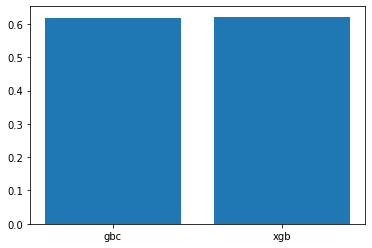

In [95]:
x = np.arange(2)
plt.bar(x, height = [
                     accuracy_score(y_test, gbc_predicted),
                     accuracy_score(y_test, xgb_predicted),
])
plt.xticks(x, ['gbc', 'xgb']);

In [96]:
confusion_matrix(y_test, xgb_predicted)

array([[2361,   41,    0,    5],
       [ 844,  125,    0,    2],
       [ 324,    0,    0,    0],
       [ 255,   43,    0,    0]])

In [102]:
!pip install catboost

     |████████████████████████████████| 76.6 MB 51 kB/s 


In [105]:
import catboost as cat

In [106]:
#catBoost는 target 라벨링 해주어야 함.
cb = cat.Pool(data = X_train, label= y_train)
cp = {
    'max_depth' : 10,
    'learning_rate' : 0.01,
    'n_estimators' : 100,
    'eval_metric' : 'Accuracy',
    'loss_function' : 'MultiClass'
}
cat_model = cat.train(pool=cb, params=cp)

0:	learn: 0.6194286	total: 179ms	remaining: 17.7s
1:	learn: 0.6164281	total: 208ms	remaining: 10.2s
2:	learn: 0.6198037	total: 246ms	remaining: 7.95s
3:	learn: 0.6221792	total: 307ms	remaining: 7.36s
4:	learn: 0.6225542	total: 397ms	remaining: 7.54s
5:	learn: 0.6229918	total: 466ms	remaining: 7.29s
6:	learn: 0.6219916	total: 484ms	remaining: 6.43s
7:	learn: 0.6218041	total: 543ms	remaining: 6.25s
8:	learn: 0.6214915	total: 613ms	remaining: 6.2s
9:	learn: 0.6218041	total: 690ms	remaining: 6.21s
10:	learn: 0.6213665	total: 710ms	remaining: 5.74s
11:	learn: 0.6213665	total: 783ms	remaining: 5.75s
12:	learn: 0.6219291	total: 871ms	remaining: 5.83s
13:	learn: 0.6220541	total: 944ms	remaining: 5.8s
14:	learn: 0.6219291	total: 1.02s	remaining: 5.81s
15:	learn: 0.6216166	total: 1.06s	remaining: 5.56s
16:	learn: 0.6213665	total: 1.15s	remaining: 5.61s
17:	learn: 0.6214290	total: 1.23s	remaining: 5.58s
18:	learn: 0.6216166	total: 1.29s	remaining: 5.51s
19:	learn: 0.6217416	total: 1.36s	remaining

In [107]:
cat_predt = np.argmax(cat_model.predict(X_test), axis=1)
accuracy_score(y_test, cat_predt)

0.61375

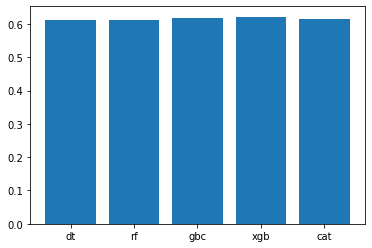

In [110]:
x = np.arange(5)
plt.bar(x, height= [
                    accuracy_score(y_test, dt_predt),
                    accuracy_score(y_test, rf_predt),
                    accuracy_score(y_test, gbc_predicted),
                    accuracy_score(y_test, xgb_predicted),
                    accuracy_score(y_test, cat_predt)
            ])
plt.xticks(x, ['dt', 'rf', 'gbc', 'xgb', 'cat']);